In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
#Analisando a importância das features numéricas
numerical_cols = [col for col in train.columns if train[col].dtype in ['int64', 'float64'] ]
numerical_cols.remove('Id')
numerical_cols.remove('SalePrice')
#criando dataset auxiliar
num_analysis = train[numerical_cols]


In [4]:
for col in numerical_cols:
    if num_analysis[col].isnull().sum()>0:
        num_analysis[col] = SimpleImputer(strategy='median').fit_transform(num_analysis[col].values.reshape(-1,1))
        

<ipython-input-4-9609ac99649a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_analysis[col] = SimpleImputer(strategy='median').fit_transform(num_analysis[col].values.reshape(-1,1))
<ipython-input-4-9609ac99649a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_analysis[col] = SimpleImputer(strategy='median').fit_transform(num_analysis[col].values.reshape(-1,1))
<ipython-input-4-9609ac99649a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

In [5]:
# ModeloExtraTressRegressor
clf = ExtraTreesRegressor(random_state =42)
etreg_model = clf.fit(num_analysis, train.SalePrice)

In [6]:
# Plotando a importancia das features numéricas
def plot_importance(model,features, num = len(numerical_cols),save= False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features})
    plt.figure(figsize=(16, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')

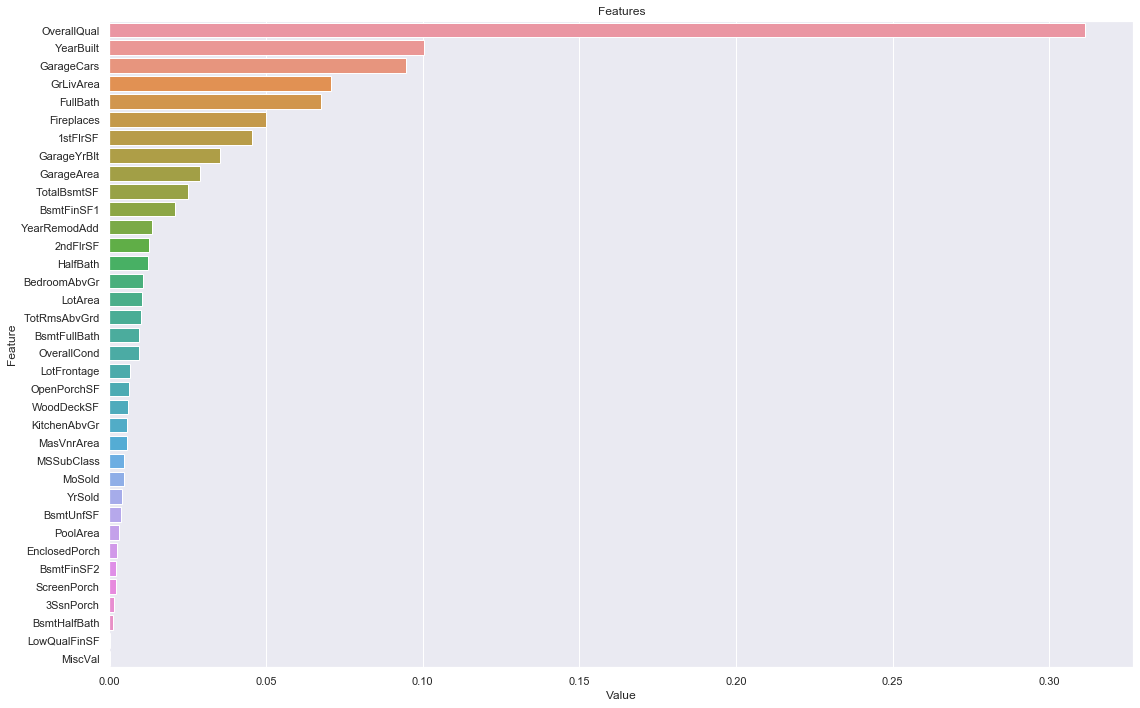

In [104]:
plot_importance(etreg_model, numerical_cols)

<AxesSubplot:title={'center':'Matriz de correlação apenas das features numéricas mais importantes '}>

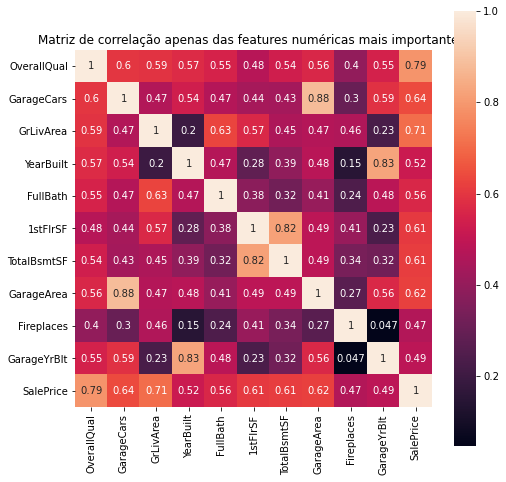

In [8]:
def plot_numerical(col, discrete=False):
    if discrete:
        fig, ax = plt.subplots(1,2,figsize=(12,6))
        sns.stripplot(x=col, y='SalePrice', data=train, ax=ax[0])
        sns.countplot(train[col], ax=ax[1])
        fig.suptitle(str(col) + ' analysis')
    else:
        fig, ax = plt.subplots(1,2,figsize=(12,6))
        sns.scatterplot(x=col, y='SalePrice', data=train, ax=ax[0])
        sns.distplot(train[col], kde=False, ax=ax[1])
        fig.suptitle(str(col) + ' analysis')

C:\Users\Gustavo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


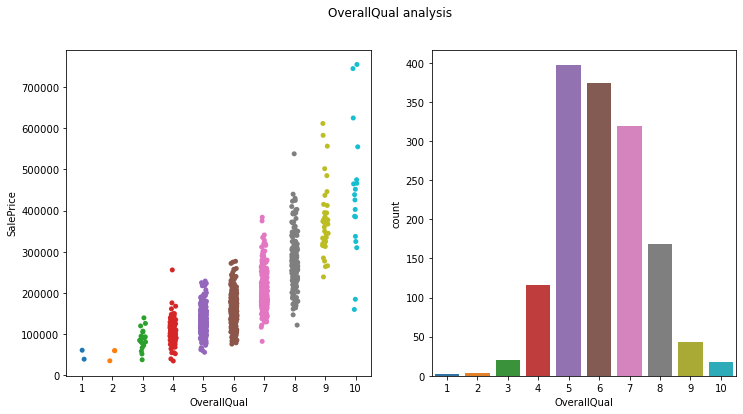

In [9]:
plot_numerical('OverallQual', discrete = True)

C:\Users\Gustavo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


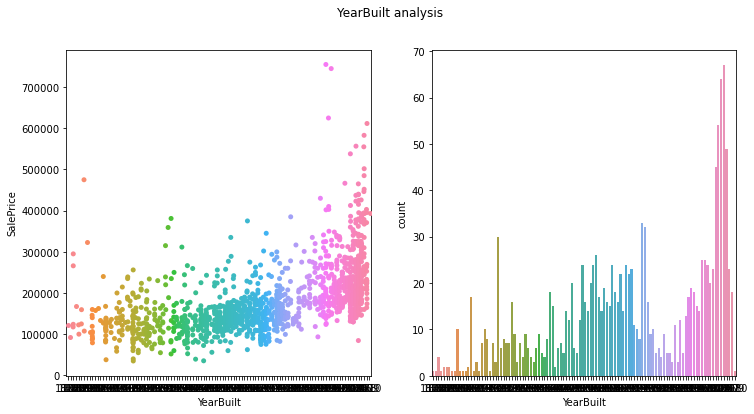

In [12]:
plot_numerical('YearBuilt', discrete = True)

In [13]:
# Analisando a importância das features categoricas 
categorical_features = [col for col in train.columns if train[col].dtype == 'object']
cat_analysis = train[categorical_features].copy()

for col in cat_analysis:
    if cat_analysis[col].isnull().sum()>0:
        cat_analysis[col] = SimpleImputer(strategy='constant').fit_transform(cat_analysis[col].values.reshape(-1,1))
    
#one hot encoder
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe
cat_analysis = one_hot_encoder(cat_analysis,categorical_features)
# Model 
clf = ExtraTreesRegressor(random_state=42)
h = clf.fit(cat_analysis, train.SalePrice)

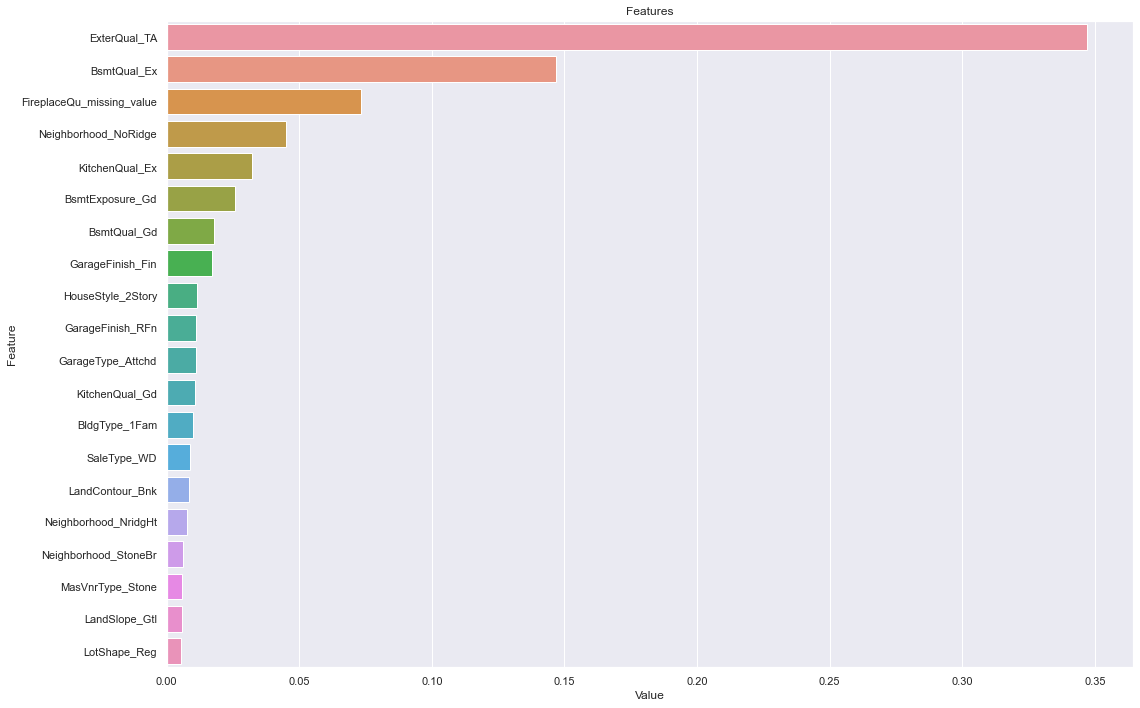

In [14]:
# Função para plotar a importância das features categoricas em relação ao target
def plot_importance(model, features, save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(16, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:20])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')

plot_importance(h, cat_analysis)

In [15]:
# Criando SalePrice na função cat_analysis
cat_analysis["SalePrice"] = train["SalePrice"]

In [16]:
# Função para analisar as features categoricas indivudualmente me relação ao SalePrice
def cat_plot(col1,col2):
    # tüm veri
    fig, ax = plt.subplots(1,2,figsize=(12,6), sharey=True)
    sns.stripplot(x=col1, y='SalePrice', data=train, ax=ax[0])
    sns.boxplot(x=col1, y='SalePrice', data=train, ax=ax[1])
    ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
    ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)
    fig.suptitle(str(col1) + ' analysis')
    
    # one-hot encoding
    fig, ax = plt.subplots(1,2,figsize=(12,6), sharey=True)
    sns.stripplot(x=col2, y='SalePrice', data=cat_analysis, ax=ax[0])
    sns.boxplot(x=col2, y='SalePrice', data=cat_analysis, ax=ax[1])
    fig.suptitle(str(col2) + ' analysis')

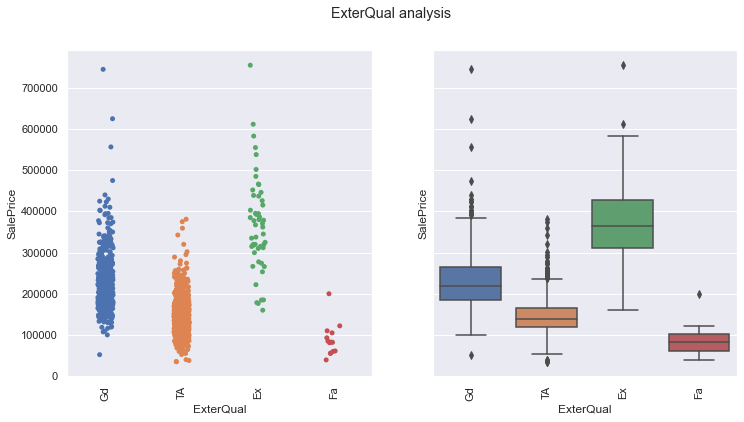

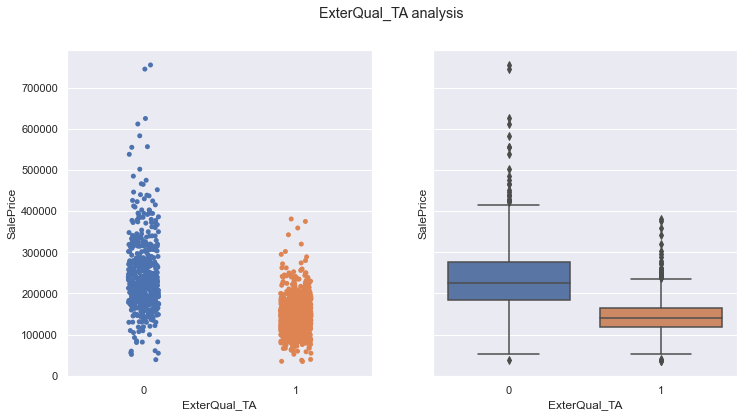

In [17]:
# Plotando as features categoricas mais importantes
cat_plot("ExterQual","ExterQual_TA")

In [18]:
# Criando dataset com train e test
data=pd.concat([train, test]).reset_index(drop=True)

In [19]:
data.shape

(2919, 81)

In [20]:
# Tabela para visualizar a quantidade de dados faltando
def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")
    if na_name:
        return na_columns
    
missing_values_table(data)

              n_miss  ratio
PoolQC          2909  99.66
MiscFeature     2814  96.40
Alley           2721  93.22
Fence           2348  80.44
SalePrice       1459  49.98
FireplaceQu     1420  48.65
LotFrontage      486  16.65
GarageCond       159   5.45
GarageYrBlt      159   5.45
GarageFinish     159   5.45
GarageQual       159   5.45
GarageType       157   5.38
BsmtExposure      82   2.81
BsmtCond          82   2.81
BsmtQual          81   2.77
BsmtFinType2      80   2.74
BsmtFinType1      79   2.71
MasVnrType        24   0.82
MasVnrArea        23   0.79
MSZoning           4   0.14
Functional         2   0.07
BsmtHalfBath       2   0.07
BsmtFullBath       2   0.07
Utilities          2   0.07
KitchenQual        1   0.03
TotalBsmtSF        1   0.03
BsmtUnfSF          1   0.03
GarageCars         1   0.03
GarageArea         1   0.03
BsmtFinSF2         1   0.03
BsmtFinSF1         1   0.03
Exterior2nd        1   0.03
Exterior1st        1   0.03
SaleType           1   0.03
Electrical         1

In [21]:
dropcols = data[['PoolQC', 'MiscFeature', 'Alley', 'Fence']]
data = data.drop(dropcols, axis=1)

In [22]:
# NAN em algumas features = ausentes, alterándo para none. 
none_cols = [ 'FireplaceQu', 'GarageType',
             'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtQual', 'BsmtCond',
             'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'MasVnrType']
#NAN em features númericas que indicam ausência substituir por 0
zero_cols = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath',
             'BsmtHalfBath', 'GarageYrBlt', 'GarageArea', 'GarageCars', 'MasVnrArea']
# Nos poucos que realmente faltam substituir pela moda
freq_cols = ['Electrical', 'Exterior1st', 'Exterior2nd', 'Functional', 'KitchenQual',
             'SaleType', 'Utilities']

for col in zero_cols:
    data[col].replace(np.nan, 0, inplace=True)

for col in none_cols:
    data[col].replace(np.nan, 'None', inplace=True)
    
for col in freq_cols:
    data[col].replace(np.nan, data[col].mode()[0], inplace=True)

In [23]:
#Checando novamente o números de dados que faltam
missing_values_table(data)

             n_miss  ratio
SalePrice      1459  49.98
LotFrontage     486  16.65
MSZoning          4   0.14


In [24]:
#Como faltam apenas 4 dados de MSZoning, preencher com a moda
data['MSZoning'] = data.groupby('MSSubClass')['MSZoning'].apply(
    lambda x: x.fillna(x.mode()[0]))

In [25]:
#Para LotFrontage preencer com a média do tamanho de acordo com cada bairro
data['LotFrontage'] = data.groupby(
    ['Neighborhood'])['LotFrontage'].apply(lambda x: x.fillna(x.median()))

In [26]:
#Verificando novamente a quantidade de dados faltando
missing_values_table(data)

           n_miss  ratio
SalePrice    1459  49.98


In [27]:
#Convertendo alguma features para o formato string
data['MSSubClass'] = data['MSSubClass'].astype(str)
data['YrSold'] = data['YrSold'].astype(str)
data['MoSold'] = data['MoSold'].astype(str)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   object 
 2   MSZoning       2919 non-null   object 
 3   LotFrontage    2919 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2919 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

In [28]:
data.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage         0
LotArea             0
                 ... 
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
SalePrice        1459
Length: 77, dtype: int64

In [47]:
pip install lazypredict --user

  Using cached lazypredict-0.2.9-py2.py3-none-any.whl (12 kB)
  Using cached lightgbm-2.3.1-py2.py3-none-win_amd64.whl (544 kB)
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [52]:
import lazypredict
from lazypredict.Supervised import LazyRegressor
from sklearn.model_selection import train_test_split

#Modelando
test_id = test_data
train_data = data[data['SalePrice'].notnull()]
test_data = data[data['SalePrice'].isnull()].drop("SalePrice", axis=1)
test_id = test_data

ModuleNotFoundError: No module named 'lazypredict'

In [ ]:
y = train_data['SalePrice']
X = train_data.drop(["Id", "SalePrice"], axis=1)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(   X, y, test_size=0.3, random_state=123)

In [ ]:
reg= LazyRegressor(verbose=0,ignore_warnings=True,custom_metric=None)
train,test=reg.fit(X_train,X_test,y_train,y_test)
test

In [ ]:
test

In [ ]:
1+2

In [133]:
#ENGENHARIA DE RECURSOS
data.groupby("Neighborhood").agg({"SalePrice":"mean"}).sort_values(by="SalePrice", ascending=False)

,SalePrice
Neighborhood,
NoRidge,335295.32
NridgHt,316270.62
StoneBr,310499.00
Timber,242247.45
Veenker,238772.73
Somerst,225379.84
ClearCr,212565.43
Crawfor,210624.73
CollgCr,197965.77


In [134]:
#Fazendo o modelo entender a ordem hierarquica de algumas features categoricas
ext_map = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
data['ExterCond'] = data['ExterCond'].map(ext_map).astype('int')

bsm_map = {'None': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}

data['BsmtCond'] = data['BsmtCond'].map(bsm_map).astype('int')

bsmf_map = {'None': 0,'Unf': 1,'LwQ': 2,'Rec': 3,'BLQ': 4,'ALQ': 5,'GLQ': 6}
data['BsmtFinType1'] = data['BsmtFinType1'].map(bsmf_map).astype('int')
data['BsmtFinType2'] = data['BsmtFinType2'].map(bsmf_map).astype('int')

heat_map = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
data['HeatingQC'] = data['HeatingQC'].map(heat_map).astype('int')

data['FireplaceQu'] = data['FireplaceQu'].map(bsm_map).astype('int')
data['GarageCond'] = data['GarageCond'].map(bsm_map).astype('int')
data['GarageQual'] = data['GarageQual'].map(bsm_map).astype('int')

In [135]:
#Tornando algumas features mais compreensíveis
data= data.replace({"MSSubClass": {20: "SC20", 30: "SC30", 40: "SC40", 45: "SC45", \
50: "SC50", 60: "SC60", 70: "SC70", 75: "SC75", \
80: "SC80", 85: "SC85", 90: "SC90", 120: "SC120", \
150: "SC150", 160: "SC160", 180: "SC180", 190: "SC190"},
"MoSold": {1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "Jun", \
7: "Jul", 8: "Aug", 9: "Sep", 10: "Oct", 11: "Nov", 12: "Dec"}})

In [136]:
func = {"Sal": 0, "Sev": 1, "Maj2": 2, "Maj1": 3, "Mod": 4, "Min2": 5, "Min1": 6, "Typ": 7}
data["Functional"] = data["Functional"].map(func).astype("int")
data.groupby("Functional").agg({"SalePrice": "mean"})

,SalePrice
Functional,
1,129000.00
2,85800.00
3,153948.14
4,168393.33
5,144240.65
6,146385.48
7,183429.15


In [137]:
# Modificando LotShape
data.groupby("LotShape").agg({"SalePrice": "mean"}).sort_values(by="SalePrice", ascending=False)
shape_map = {"Reg": 1, "IR1": 2, "IR3": 3, "IR2": 4}
data['LotShape'] = data['LotShape'].map(shape_map).astype('int')

In [138]:
# ONE-HOT ENCONDER
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

In [151]:
categorical_features.remove('PoolQC')
categorical_features.remove('MiscFeature')
categorical_features.remove('Alley')
categorical_features.remove('Fence')

In [152]:
#Transformando as variaveis categóricas em dummys 
data = one_hot_encoder(data, categorical_features, drop_first=True)
data.shape

(2919, 248)

In [153]:
#Modelando
test_id = test_data
train_data = data[data['SalePrice'].notnull()]
test_data = data[data['SalePrice'].isnull()].drop("SalePrice", axis=1)
test_id = test_data

In [154]:
y = train_data['SalePrice']
X = train_data.drop(["Id", "SalePrice"], axis=1)

In [155]:
import lazypredict
from lazypredict.Supervised import LazyRegressor
from sklearn.model_selection import train_test_split

In [163]:
X_train,X_test,y_train,y_test = train_test_split(   X, y, test_size=0.3, random_state=123)

In [157]:
reg= LazyRegressor(verbose=0,ignore_warnings=True,custom_metric=None)
train,test=reg.fit(X_train,X_test,y_train,y_test)
test

100%|██████████████████████████████████████████████████████████████████████████████████| 38/38 [00:17<00:00,  2.12it/s]


,R-Squared,RMSE,Time Taken
Model,,,
GradientBoostingRegressor,0.88,25889.62,0.63
BaggingRegressor,0.88,26478.74,0.34
XGBRegressor,0.87,26838.37,1.44
HistGradientBoostingRegressor,0.87,27078.99,4.03
LGBMRegressor,0.87,27208.82,1.15
RandomForestRegressor,0.87,27237.99,0.30
ExtraTreesRegressor,0.86,28709.56,0.25
BayesianRidge,0.84,29989.75,0.30
HuberRegressor,0.84,29999.90,0.40


In [161]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier, GradientBoostingRegressor

In [162]:
modelo = GradientBoostingRegressor()

In [164]:
modelo.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [166]:
score_train = modelo.score(X_train,y_train)
score_train

0.9726006077116238

In [167]:
y_pred = modelo.predict(X_test)

In [168]:
score_test = modelo.score(X_test,y_test)

In [169]:
score_test

0.8960935328988163

In [170]:

mse = mean_squared_error(y_test, modelo.predict(X_test))

In [171]:
mse

596262700.1968161

In [91]:
from sklearn.metrics import classification_report, f1_score, precision_score, average_precision_score,accuracy_score

In [74]:
y_test.shape, y_pred.shape

((438,), (438,))

In [75]:
cr = classification_report(y_test,y_pred, labels=[0,1])
print(cr)

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

In [158]:
model = GradientBoostingRegressor()

In [159]:
model.fit(X_test, y_test)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [160]:
score_model = modelo.score(X_train,y_train)
score_model

ValueError: Number of features of the model must match the input. Model n_features is 259 and input n_features is 246 

In [84]:
y_previsto = model.predict(X_test)

In [81]:
model_score = model.score(X_test,y_test)
model_score

0.9931506849315068

In [86]:
mse = mean_squared_error(y_test, model.predict(X_test))
mse

1838470.3196347032

              precision    recall  f1-score   support

     37900.0       1.00      1.00      1.00         1
     52500.0       1.00      1.00      1.00         1
     55000.0       1.00      1.00      1.00         1
     60000.0       1.00      1.00      1.00         1
     72500.0       1.00      1.00      1.00         1
     79000.0       1.00      1.00      1.00         1
     79900.0       1.00      1.00      1.00         2
     80000.0       1.00      1.00      1.00         4
     82500.0       1.00      1.00      1.00         1
     83000.0       1.00      1.00      1.00         1
     85500.0       0.50      1.00      0.67         1
     87000.0       1.00      1.00      1.00         1
     88000.0       1.00      1.00      1.00         1
     89000.0       1.00      1.00      1.00         1
     89500.0       1.00      1.00      1.00         2
     93000.0       1.00      1.00      1.00         1
     94750.0       1.00      1.00      1.00         1
     95000.0       1.00    

In [88]:
f1 = f1_score(y_test, y_previsto, average='macro')
f1

0.9956222181574296

In [90]:
prec = precision_score(y_test, y_previsto, average='macro')
prec

0.9964788732394366

In [94]:
acc = accuracy_score(y_test, y_previsto)
acc

0.9931506849315068

In [96]:
X_test.columns

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'EnclosedPorch',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=259)

In [176]:
test_pred = modelo.predict(X_test)
test_id =test['Id']  


KeyError: 'Id'

In [ ]:
submission = pd.DataFrame(test_id, columns = ['Id'])
test_pred = np.expm1(test_pred)
submission['SalePrice'] = test_pred 
submission.head()